### Step-by-step implementation

In [4]:
%pip install numpy matplotlib scikit-learn

import numpy as np
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.

[notice] A new release of pip available: 22.2.1 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


     --------------------------------------- 12.9/12.9 MB 40.9 MB/s eta 0:00:00
     ---------------------------------------- 8.1/8.1 MB 46.8 MB/s eta 0:00:00
     --------------------------------------- 11.1/11.1 MB 34.5 MB/s eta 0:00:00
     ---------------------------------------- 71.9/71.9 kB ? eta 0:00:00
     ---------------------------------------- 221.2/221.2 kB ? eta 0:00:00
     ---------------------------------------- 111.1/111.1 kB ? eta 0:00:00
     ---------------------------------------- 2.7/2.7 MB 17.0 MB/s eta 0:00:00
     ---------------------------------------- 2.2/2.2 MB 17.8 MB/s eta 0:00:00
     --------------------------------------- 41.3/41.3 MB 15.2 MB/s eta 0:00:00
     ------------------------------------- 307.7/307.7 kB 18.6 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


In [5]:
import numpy as np

age = np.array([18, 20, 22, 
                30, 34, 40, 
                60, 66, 70])

expenditure = np.array([80, 90, 85, 
                   50, 64, 60, 
                   30, 40, 25])

In [6]:
# 1. data

X = np.column_stack((age, expenditure))
print(X)

[[18 80]
 [20 90]
 [22 85]
 [30 50]
 [34 64]
 [40 60]
 [60 30]
 [66 40]
 [70 25]]


In [10]:
k = 3
max_iters = 2

# initialize centroids
centroids = X[2:k+2]
print('Init centroids: \n', centroids)

for _ in range(max_iters):
    # assign points 
    distances = np.linalg.norm(X[:, np.newaxis, :] - centroids, axis=2)
    labels = np.argmin(distances, axis=1)
    
    # update centroids
    new_centroids = np.array([X[labels == i].mean(axis=0) for i in range(k)])
    
    # check for convergence
    if np.all(centroids == new_centroids):
        break
    
    centroids = new_centroids    

    # print
    print("Labels: \n", labels)
    print("Centroids:\n", centroids)
    print()

# calculate WCSS
wcss = np.sum([np.sum(np.square(X[labels == i] - centroids[i])) for i in range(k)])
print("WCSS:", wcss)

Init centroids: 
 [[22 85]
 [30 50]
 [34 64]]
Labels: 
 [0 0 0 1 2 2 1 1 1]
Centroids:
 [[20.   85.  ]
 [56.5  36.25]
 [37.   62.  ]]

Labels: 
 [0 0 0 2 2 2 1 1 1]
Centroids:
 [[20.         85.        ]
 [65.33333333 31.66666667]
 [34.66666667 58.        ]]

WCSS: 380.0


### Using sklearn

In [11]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=3)
kmeans.fit(X.reshape(-1, 2))
labels = kmeans.labels_

print(labels)
print(kmeans.inertia_)

for x, label in zip(X, labels):
    print(f"Cluster {label}: {x}")

[0 0 0 2 2 2 1 1 1]
380.0
Cluster 0: [18 80]
Cluster 0: [20 90]
Cluster 0: [22 85]
Cluster 2: [30 50]
Cluster 2: [34 64]
Cluster 2: [40 60]
Cluster 1: [60 30]
Cluster 1: [66 40]
Cluster 1: [70 25]


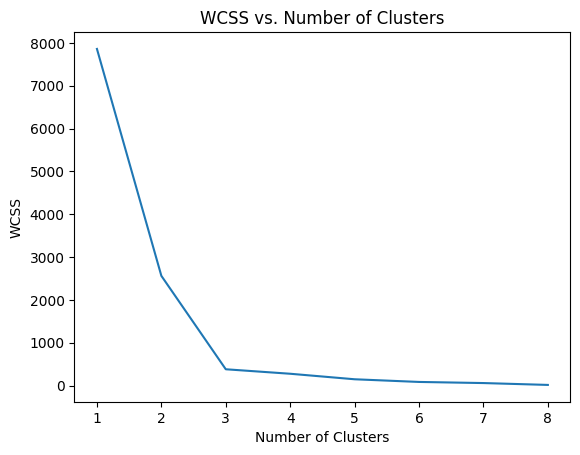

In [16]:
import matplotlib.pyplot as plt

wcss_values = []
for i in range(1, 9):
    kmeans = KMeans(n_clusters=i)
    kmeans.fit(X.reshape(-1, 2))
    wcss = kmeans.inertia_
    wcss_values.append(wcss)
    
plt.plot(range(1, 9), wcss_values)
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.title('WCSS vs. Number of Clusters')
plt.show()